This notebook aims to replicate experiments for one-tailed hypothesis tests on log-normally distributed data using a method sometimes referred to as the "Modified Cox Method."

**Background:**

The SciPy library currently lacks a dedicated function for performing one-tailed hypothesis tests for log-normally distributed data.
This limitation can hinder statistical analyses in various fields where log-normal distributions are frequently encountered.

**Methodology:**

This notebook simulates the effectiveness of the "Modified Cox Method," described in the statistical literature, as a potential solution for the aforementioned limitation.
This method has shown promising results in experimental settings, achieving a confidence interval coverage of approximately 95%, particularly as documented in Olsson (2005) [https://www.tandfonline.com/doi/pdf/10.1080/10691898.2005.11910638](https://www.tandfonline.com/doi/pdf/10.1080/10691898.2005.11910638).
This coverage rate is generally considered a benchmark for the robustness and reliability of statistical methods.

In this notebook, samples of sizes ranging from 5 to 1000 are generated from a log-normal distribution whose underlying normal distribution has a mean of 0 and a standard deviation of 1. One thousand replications are used for each sample size.

**Objective:**

The primary objective of this notebook is to replicate the experiment to evaluate the performance of the implemented method. Simulations are conducted to assess whether the proposed function achieves the desired 95% coverage rate for one-tailed hypothesis tests on log-normally distributed data. Other parameters, such as the mean and standard deviation of the underlying normal distribution and the number of bootstrap replicates, can be modified.

**Outcomes:**

* Replication of the experiment with the same inputs as in Olsson (2005) produced analogous results.
* The method appears to produce a confidence interval coverage around 95%, especially for sample sizes above 100.
* It would be useful for practitioners and researchers to have this method readily available in Python.  Similar methods are already available for R practitioners [https://search.r-project.org/CRAN/refmans/EnvStats/html/elnormAlt.html](https://search.r-project.org/CRAN/refmans/EnvStats/html/elnormAlt.html), among others aimed at similar analyses.

In [10]:
# imports
import numpy as np
import scipy.stats
import pandas as pd

from helpers import run_experiment

In [3]:
sample_sizes = [5, 10, 20, 30, 50, 100, 200 , 500, 1000]

In [14]:
df = run_experiment(sample_sizes=sample_sizes, significance_level=0.05, sample_replications=1000)

In [17]:
1 - df.groupby('sample_size').mean()

,null_hypothesis_rejected
sample_size,
5,0.907
10,0.922
20,0.947
30,0.942
50,0.934
100,0.954
200,0.951
500,0.962
1000,0.941


<Axes: xlabel='sample_size'>

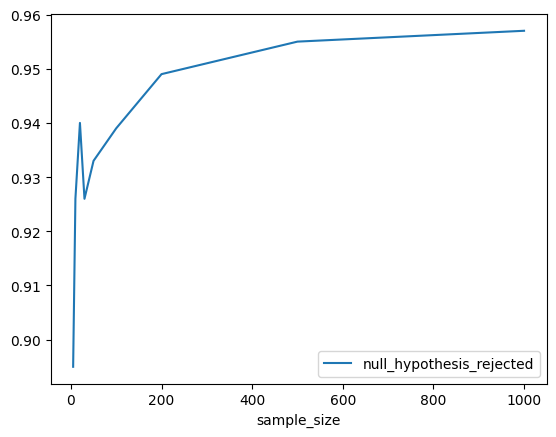

In [312]:
(1 - df.groupby('sample_size').mean()).plot()

In [11]:
bdf = run_experiment(sample_sizes=sample_sizes, significance_level=0.05, sample_replications=1000, bootstrap_replicates=1000)

<Axes: xlabel='sample_size'>

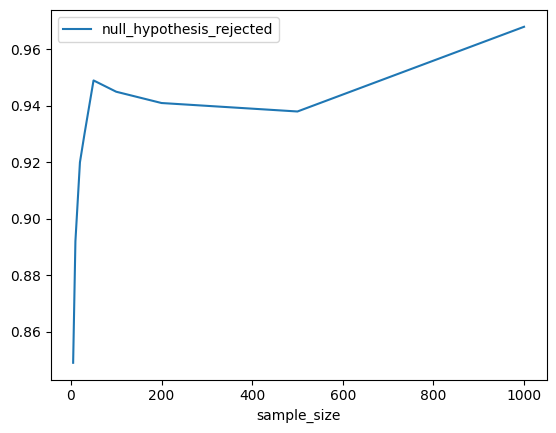

In [12]:
(1 - bdf.groupby('sample_size').mean()).plot()